<a href="https://colab.research.google.com/github/Psychohistorian11/Fisica_II/blob/master/Clases/PracticaExamen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema

Una cubeta de 2,00 kg que contiene 10,0 kg de agua cuelga de un resorte ideal vertical, cuya constante de fuerza es de 125 N/m, y oscila verticalmente con una amplitud de 3,00 cm . De repente, la cubeta dimana una fuga en la base, goteando agua a una tasa constante de 10,00 g/s. Empleando un método numérico calcule la posición, la velocidad y la aceleración de la cubeta como función del tiempo. Adicionalmente determine computacionalmente la variación del periodo de oscilación como función del tiempo y compare con la predicción analítica

# Analisis



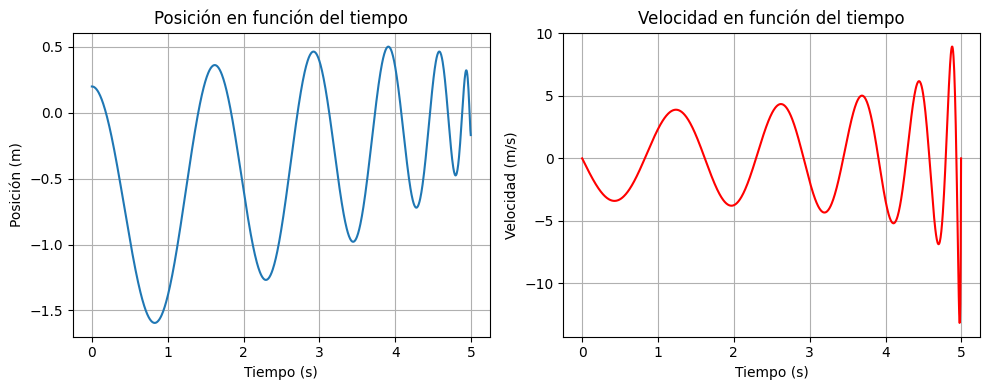

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def verlet1D(x0, v0, m, k, g=9.81, dt=0.005, nts=1000):
    """
    x0: posición inicial
    v0: velocidad inicial
    m: masa en kilogramos
    k: constante del resorte en N/m
    """
    x = np.zeros(nts)
    t = np.zeros(nts)
    v = np.zeros(nts)
    x[0] = x0
    v[0] = v0
    t[0] = 0.0
    x[1] = x0 + v0 * dt
    t[1] = dt

    for i in range(1, nts - 1):
        # Reducción de masa debido a la fuga de agua (10 g/s)
        dm = 0.01  # 10 g = 0.01 kg
        m -= dm
        x[i + 1] = 2.0 * x[i] - x[i - 1] - ((k * x[i] / m) + g) * dt**2
        t[i + 1] = t[i] + dt
        v[i] = (x[i + 1] - x[i]) / dt

    return x, v, t

x, v, t = verlet1D(0.2, 0.0, 10.0, 125.0, dt=0.005)


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, x)
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.title("Posición en función del tiempo")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t, v, color='red')
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.title("Velocidad en función del tiempo")

plt.tight_layout()
plt.grid()
plt.show()